In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
from random import shuffle
import sklearn.model_selection

In [2]:
categori=["Cat","Dog"]
DIR="/content/drive/MyDrive/cat_dog/PetImages"
boyut=128
veri=[]

for kategori in categori:
  klasor_adresi = os.path.join(DIR,kategori)
  #label(cat and dog) deger değişkenine aktarılır.
  deger = categori.index(kategori)
  for resim_adi in tqdm(os.listdir(klasor_adresi)):
    resim_adresi = os.path.join(klasor_adresi,resim_adi)
    resim = cv2.imread(resim_adresi, cv2.IMREAD_COLOR)
    if(resim is None):#resimlerden none değer resimler olduğundan bu resimlere denk geldiğinde hata yazdır.
      print("Hata")
    else:
      #resimler tekrardan boyutlandırılır.
      resim = cv2.resize(resim,(boyut,boyut))
      resim=cv2.cvtColor(resim, cv2.COLOR_BGR2RGB)
      #resimler normalize edilir.
      resim=resim.astype(np.float32)/255
      #resimleri okuyup veri adında boş bir listeye eklenir.
      veri.append([resim,deger])



 16%|█▌        | 446/2786 [00:09<00:14, 164.25it/s]

Hata
Hata


 24%|██▍       | 662/2786 [00:11<00:14, 150.69it/s]

Hata


 27%|██▋       | 760/2786 [00:11<00:12, 157.66it/s]

Hata


 60%|██████    | 1674/2786 [00:17<00:07, 151.01it/s]

Hata


 81%|████████  | 2247/2786 [00:21<00:03, 170.92it/s]

Hata


 50%|████▉     | 1383/2779 [00:12<00:08, 161.00it/s]

Hata


 61%|██████    | 1697/2779 [00:14<00:07, 153.90it/s]

Hata


 77%|███████▋  | 2129/2779 [00:17<00:03, 170.13it/s]

Hata


100%|██████████| 2779/2779 [00:21<00:00, 130.63it/s]

Hata


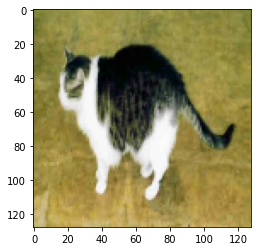

In [3]:
plt.imshow(veri[1][0])

In [4]:
import random
random.shuffle(veri)
X= [] #karıştırılmış kedi ve köpek resimleri
Y= [] #0:kedi, 1: köpek

for x,y in veri:
  X.append(x)
  Y.append(y)
#resimler ve label iki ayrı boş listeye eklendi.

0


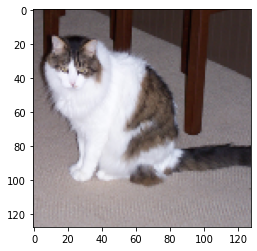

In [5]:
plt.imshow(X[34])
print(Y[34])

In [6]:
X=np.array(X)
Y=np.array(Y)
X_train, X_test, y_train, y_test=sklearn.model_selection.train_test_split(X,Y,test_size=0.2, shuffle=True, random_state=8)
X_train, X_val, y_train, y_val= sklearn.model_selection.train_test_split(X_train, y_train, test_size=0.25, random_state=8)

In [7]:
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train)
print("X_val shape: ", X_val.shape)
print("y_val shape: ", y_val.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)



X_train shape:  (3333, 128, 128, 3)
y_train shape:  [0 0 0 ... 0 1 0]
X_val shape:  (1111, 128, 128, 3)
y_val shape:  (1111,)
X_test shape:  (1111, 128, 128, 3)
y_test shape:  (1111,)


In [8]:
from tensorflow.keras import optimizers
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Conv2D, Activation, BatchNormalization, Flatten, Dense, MaxPool2D
from tensorflow.keras.optimizers import Adam


In [9]:
#model seçilir
def model1():
  model = Sequential()
  model.add(Conv2D(filters=128,kernel_size=(3,3),input_shape=X[0].shape,activation='relu',padding="same"))
  model.add(MaxPool2D(pool_size=(2,2)))
  model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding="same"))
  model.add(MaxPool2D(pool_size=(2,2)))
  model.add(BatchNormalization())
  model.add(Flatten())
  model.add(Dense(64,activation='relu'))
  model.add(Dense(32,activation='relu'))
  #model.add(Dropout(0.5))
  model.add(Dense(1,activation='sigmoid'))
  model.compile( Adam(learning_rate=1e-4),loss='binary_crossentropy',  metrics=['accuracy'])
  return model

model=model1()  
print(model.summary())




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 64)       256       
 ormalization)                                                   
                                                        

In [ ]:
#seçtiğimiz modelle veriler eğitilir.
history = model.fit(X_train, y_train, epochs = 10, validation_data = (X_val, y_val), batch_size = 32, verbose = 1, shuffle = 1)

Epoch 1/10
105/105 [==============================] - 270s 3s/step - loss: 0.6647 - accuracy: 0.6100 - val_loss: 0.6767 - val_accuracy: 0.6301
Epoch 2/10
105/105 [==============================] - 277s 3s/step - loss: 0.4828 - accuracy: 0.7696 - val_loss: 0.6657 - val_accuracy: 0.6202
Epoch 3/10
105/105 [==============================] - 275s 3s/step - loss: 0.3376 - accuracy: 0.8632 - val_loss: 0.6331 - val_accuracy: 0.6283
Epoch 4/10
105/105 [==============================] - 277s 3s/step - loss: 0.1955 - accuracy: 0.9286 - val_loss: 0.5834 - val_accuracy: 0.6778
Epoch 5/10
105/105 [==============================] - 277s 3s/step - loss: 0.0859 - accuracy: 0.9841 - val_loss: 0.5814 - val_accuracy: 0.7147
Epoch 6/10
105/105 [==============================] - 283s 3s/step - loss: 0.0388 - accuracy: 0.9946 - val_loss: 0.6763 - val_accuracy: 0.7138
Epoch 7/10
105/105 [==============================] - 286s 3s/step - loss: 0.0161 - accuracy: 0.9994 - val_loss: 0.7986 - val_accuracy: 0.7201

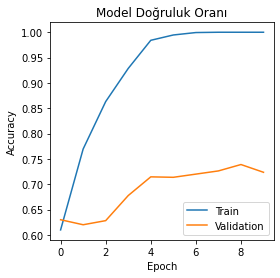

0.7389739155769348


<Figure size 432x288 with 0 Axes>

In [13]:
#val_accuracy ve accuracy değerleri grafikte gösterilmiştir.
plt.figure(figsize=(4,4))
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model Doğruluk Oranı')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='lower right')
plt.show()
plt.savefig('cat.png',dpi=300)
print(max(model.history.history['val_accuracy']))

In [14]:
from keras.preprocessing.image import load_img, ImageDataGenerator

def data_aug():
    data_generator= ImageDataGenerator(height_shift_range = 0.1, width_shift_range = 0.1, shear_range=0.1, zoom_range =0.1,rotation_range=10)
    data_generator.fit(X_train)
    return data_generator

data_aug()    

In [15]:
import keras
def model2():
  model = Sequential()
  model.add(Conv2D(filters=224,kernel_size=(3,3),input_shape=X[0].shape,activation='relu',padding="same"))
  model.add(MaxPool2D(pool_size=(2,2)))
  model.add(Conv2D(filters=224,kernel_size=(3,3),activation='relu',padding="same"))
  model.add(MaxPool2D(pool_size=(2,2)))
  model.add(BatchNormalization())
  model.add(Flatten())
  model.add(Dense(64,activation='relu'))
  model.add(Dense(32,activation='relu'))
  model.add(keras.layers.Dropout(0.5))
  model.add(Dense(1,activation='sigmoid'))
  model.compile( Adam(learning_rate=0.001),loss='categorical_crossentropy',  metrics=['accuracy'])
  return model

model=model2()  
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 128, 128, 224)     6272      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 64, 64, 224)      0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 224)       451808    
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 32, 32, 224)      0         
 2D)                                                             
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 224)      896       
 hNormalization)                                                 
                                                      

In [17]:
history = model.fit(X_train, y_train, epochs = 10, validation_data = (X_val, y_val), batch_size = 50, steps_per_epoch = 100, verbose = 1, shuffle = 1)

Epoch 1/10
100/100 [==============================] - 1481s 15s/step - loss: 0.0000e+00 - accuracy: 0.5057 - val_loss: 0.0000e+00 - val_accuracy: 0.5041
Epoch 2/10
100/100 [==============================] - 1441s 14s/step - loss: 0.0000e+00 - accuracy: 0.4983 - val_loss: 0.0000e+00 - val_accuracy: 0.5041
Epoch 3/10
100/100 [==============================] - 1456s 15s/step - loss: 0.0000e+00 - accuracy: 0.5008 - val_loss: 0.0000e+00 - val_accuracy: 0.5041
Epoch 4/10
100/100 [==============================] - 1436s 14s/step - loss: 0.0000e+00 - accuracy: 0.5049 - val_loss: 0.0000e+00 - val_accuracy: 0.5041
Epoch 5/10
100/100 [==============================] - 1420s 14s/step - loss: 0.0000e+00 - accuracy: 0.5034 - val_loss: 0.0000e+00 - val_accuracy: 0.5041
Epoch 6/10
100/100 [==============================] - 1421s 14s/step - loss: 0.0000e+00 - accuracy: 0.5023 - val_loss: 0.0000e+00 - val_accuracy: 0.5041
Epoch 7/10
 69/100 [===================>..........] - ETA: 6:46 - loss: 0.0000e+00

100/100 [==============================] - 997s 10s/step - loss: 0.0000e+00 - accuracy: 0.5023 - val_loss: 0.0000e+00 - val_accuracy: 0.5041


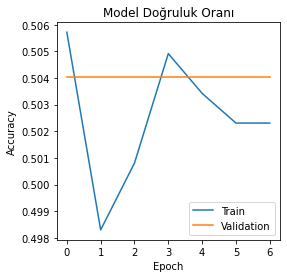

0.5040504336357117


<Figure size 432x288 with 0 Axes>

In [25]:
#val_accuracy ve accuracy değerleri grafikte gösterilmiştir.
plt.figure(figsize=(4,4))
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model Doğruluk Oranı')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='lower right')
plt.show()
plt.savefig('cat.png',dpi=300)
print(max(model.history.history['val_accuracy']))

In [19]:
model.save('en_iyi_model.h5')

In [20]:
from tensorflow.keras.models import load_model
yuklenen_model = load_model('en_iyi_model.h5')

In [21]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(Y,yuklenen_model.predict(X).round()))
print(classification_report(Y,yuklenen_model.predict(X).round()))

[[2780    0]
 [2775    0]]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67      2780
           1       0.00      0.00      0.00      2775

    accuracy                           0.50      5555
   macro avg       0.25      0.50      0.33      5555
weighted avg       0.25      0.50      0.33      5555



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0.]


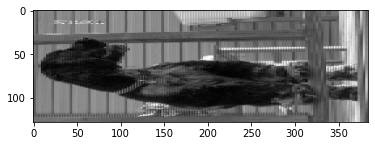

In [24]:
import numpy
print(yuklenen_model.predict(X)[1])
plt.imshow(numpy.column_stack(X[1]),cmap='gray')